In [3]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plotting_context
from pathlib import Path
plt.rcParams['figure.figsize'] = (8, 4)
from src.func import labmtgen

In [18]:
results_path = Path("results/parkstop_vals.json")
with open(results_path) as f:
    stopvals = json.load(f)

In [21]:
len(senti_dict)

10222

In [6]:
words = labmtgen.load_labmt_words("../data/raw/data_labmt_simple.txt")
senti_dict = words.set_index('Word').to_dict()['Happs']

In [29]:
new_dict = {}
for word in senti_dict.keys():
    wl = [senti_dict[word]]
    if word in stopvals.keys():
        wl.append(1)
    else:
        wl.append(0)
    new_dict[word] = wl

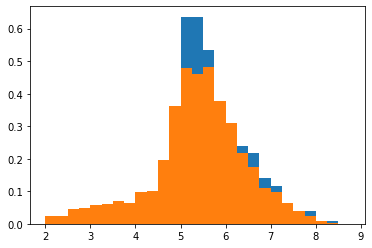

In [153]:
x_vals = list(hist_labmt[1])[:-1]
hist_stop = plt.hist(x=list(stopvals.values()),bins=np.arange(2,9,.25), density=True);
hist_labmt = plt.hist(x=list(senti_dict.values()),bins=np.arange(2,9,.25), density=True);

ratio_vals = []
for x,y in zip(hist_stop[0], hist_labmt[0]):
    ratio_vals.append(x/y)

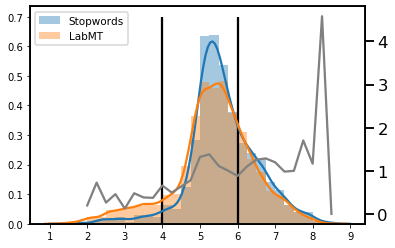

In [157]:
fig,ax = plt.subplots()
with plotting_context("talk", font_scale=1):
    g = sns.distplot(list(stopvals.values()),kde=True,bins=np.arange(2,9,.25), label="Stopwords", ax=ax)
    g1 =sns.distplot(list(senti_dict.values()),kde=True,bins=np.arange(2,9,.25), label="LabMT",ax=ax)
    plt.vlines([4,6],0,.7)
    plt.legend(loc='upper left',fontsize='xx-small')
    ax2 = ax.twinx()
    g2 = sns.lineplot(x_vals, ratio_vals, color='grey')

plt.savefig('./figures/hist_stops.png', dpi=300)